Student Performance vs Relationship Quality 

Savanna Skinner, Dane Reinson, Sam Zhang, Yuvraj Grover

Introduction


  This project is centered around a data set comprised of student’s grades and lifestyle from a secondary school in Portugal. The data collected includes binary, numeric, and nominal variables, and for the purposes of this project only numeric and binary variables will be used. The goal of this project is to predict the final grade of a student in the Portugues secondary school data set without the use of the student’s previous grades to aid in the prediction. To make this prediction, different variables relating to the student’s familial and personal relationships will be used to determine a range for their final grade using a KNN algorithm. With the Portuguese grading system this means students will fall into various categories from A, B, C, D, and F. The predictive question is that Is it possible to predict whether students are more likely to receive higher grades if they have healthy familial and personal relationships?

Preliminary Data Analysis

In [80]:

library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)


In [81]:
student_por<- read_csv2("group_project/student-por.csv")
student_mat<-read_csv2("group_project/student-mat.csv")

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Parsed with column specification:
cols(
  .default = col_character(),
  age = col_double(),
  Medu = col_double(),
  Fedu = col_double(),
  traveltime = col_double(),
  studytime = col_double(),
  failures = col_double(),
  famrel = col_double(),
  freetime = col_double(),
  goout = col_double(),
  Dalc = col_double(),
  Walc = col_double(),
  health = col_double(),
  absences = col_double(),
  G1 = col_double(),
  G2 = col_double(),
  G3 = col_double()
)

See spec(...) for full column specifications.

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Parsed with column specification:
cols(
  .default = col_character(),
  age = col_double(),
  Medu = col_double(),
  Fedu = col_double(),
  traveltime = col_double(),
  studytime = col_double(),
  failures = col_double(),
  famrel = col_double(),
  freetime = col_double(),
  goout = col_double(),
  Dalc = col_double(),
  Wal

In [82]:
student_data<-merge(student_por,student_mat,all=TRUE)
student_data

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,15,R,GT3,T,1,1,at_home,other,⋯,3,1,2,1,1,1,4,13,13,13
GP,F,15,R,GT3,T,1,1,at_home,other,⋯,3,1,2,1,1,1,2,7,10,10
GP,F,15,R,GT3,T,1,1,other,other,⋯,5,5,5,1,1,1,2,8,9,9
GP,F,15,R,GT3,T,1,1,other,other,⋯,3,3,4,2,4,5,2,13,11,11
GP,F,15,R,GT3,T,1,1,other,other,⋯,3,3,4,2,4,5,2,8,6,5
GP,F,15,R,GT3,T,2,2,at_home,other,⋯,4,3,1,1,1,2,8,14,13,12
GP,F,15,R,GT3,T,2,2,at_home,other,⋯,4,3,1,1,1,2,8,14,13,13
GP,F,15,R,GT3,T,2,4,services,health,⋯,4,3,2,1,1,5,2,10,11,10
GP,F,15,R,GT3,T,2,4,services,health,⋯,4,3,2,1,1,5,2,10,9,8


In [83]:
summary(student_data)

    school              sex                 age          address         
 Length:1044        Length:1044        Min.   :15.00   Length:1044       
 Class :character   Class :character   1st Qu.:16.00   Class :character  
 Mode  :character   Mode  :character   Median :17.00   Mode  :character  
                                       Mean   :16.73                     
                                       3rd Qu.:18.00                     
                                       Max.   :22.00                     
   famsize            Pstatus               Medu            Fedu      
 Length:1044        Length:1044        Min.   :0.000   Min.   :0.000  
 Class :character   Class :character   1st Qu.:2.000   1st Qu.:1.000  
 Mode  :character   Mode  :character   Median :3.000   Median :2.000  
                                       Mean   :2.603   Mean   :2.388  
                                       3rd Qu.:4.000   3rd Qu.:3.000  
                                       Max.   :4.000   M

In [84]:
student_split <- initial_split(student_data, prop = 0.75,)
student_train <- training(student_split)
student_test <- testing(student_split)

In [85]:


student_train<-select(student_train, famrel, Pstatus, famsize, famsup,romantic,G3)

In [86]:
student_famrel_plot<-ggplot( student_train , aes(x=famrel,y=G3, group=famrel))+ 
    geom_boxplot()+
    xlab("Scale of Quality of Family Relationships")+
    ylab("Final Grade")+
    ggtitle("Grades vs Familty Relationship")

   

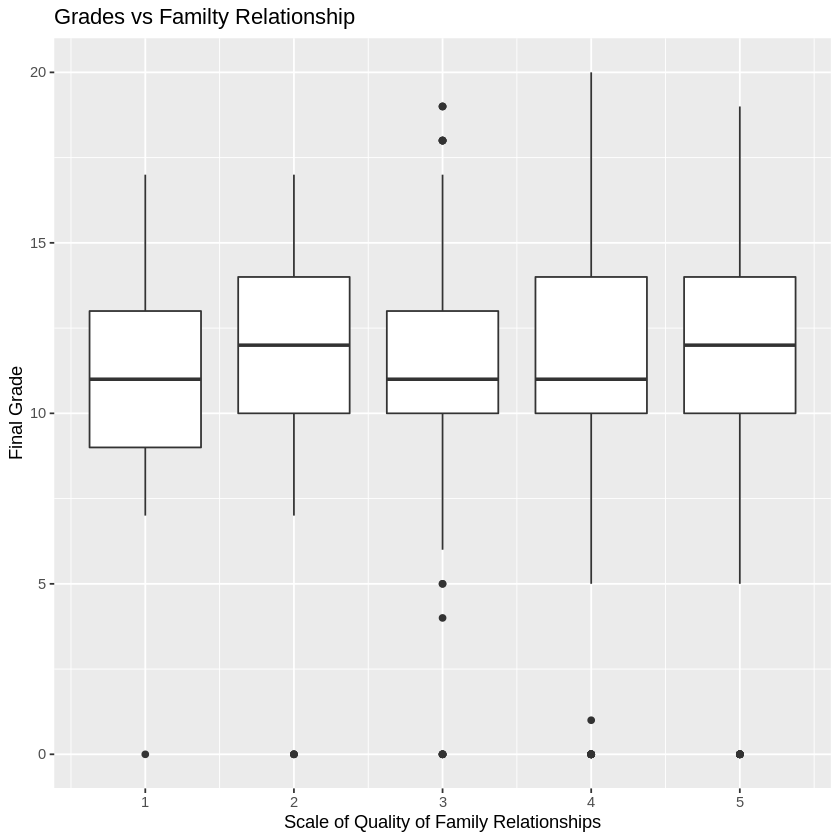

In [87]:
student_famrel_plot

In [88]:
student_train_letters<-mutate(student_train, G3 = case_when(G3=="0" ~ "F",
                                                            G3=="1" ~ "F",
                                                            G3=="2" ~ "F",
                                                            G3=="3" ~ "F",
                                                            G3=="4" ~ "D",
                                                            G3=="5" ~ "D",
                                                            G3=="6" ~ "D",
                                                            G3=="7" ~ "D",
                                                            G3=="8" ~ "C",
                                                            G3=="9" ~ "C",
                                                            G3=="10" ~ "C",
                                                            G3=="11" ~ "C",
                                                            G3=="12" ~ "B",
                                                            G3=="13" ~ "B",
                                                            G3=="14" ~ "B",
                                                            G3=="15" ~ "B",
                                                            G3=="16" ~ "A",
                                                            G3=="17" ~ "A",
                                                            G3=="18" ~ "A",
                                                            G3=="19" ~ "A",
                                                            G3=="20" ~ "A"))
student_train_letters

famrel,Pstatus,famsize,famsup,romantic,G3
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
3,T,GT3,yes,no,B
5,T,GT3,no,yes,C
3,T,GT3,yes,yes,D
4,T,GT3,yes,no,B
4,T,GT3,yes,no,C
4,T,GT3,yes,no,C
4,T,GT3,yes,yes,C
4,T,GT3,yes,no,B
4,T,GT3,yes,no,C


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


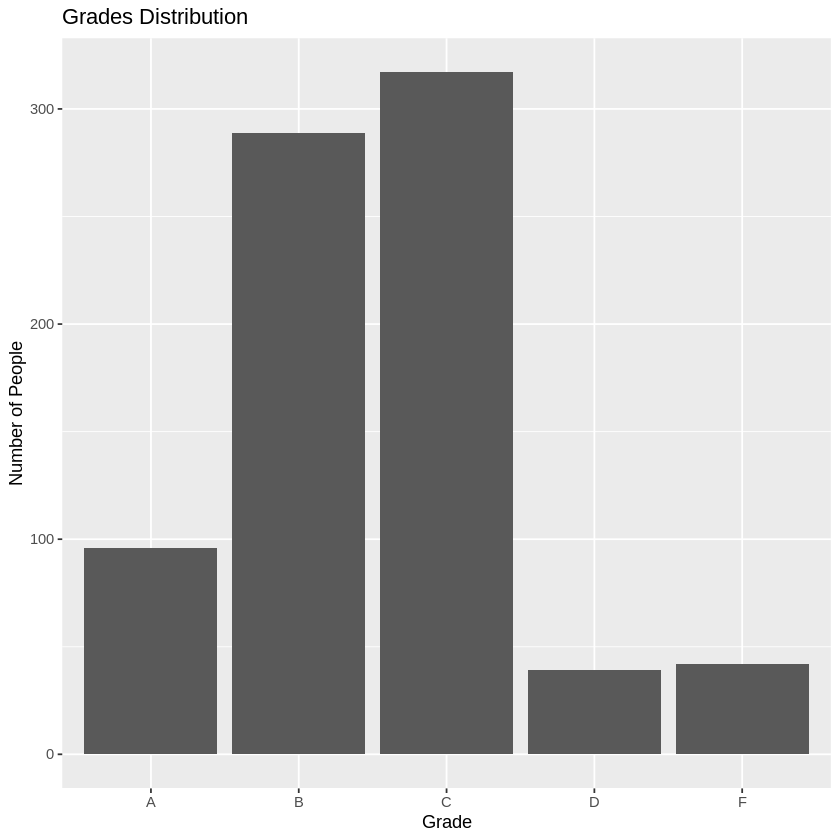

In [89]:
student_grades_distribution_plot<-ggplot(student_train_letters,aes(x=G3))+geom_histogram(stat="count")+
    xlab("Grade")+
    ylab("Number of People")+
    ggtitle("Grades Distribution")
student_grades_distribution_plot

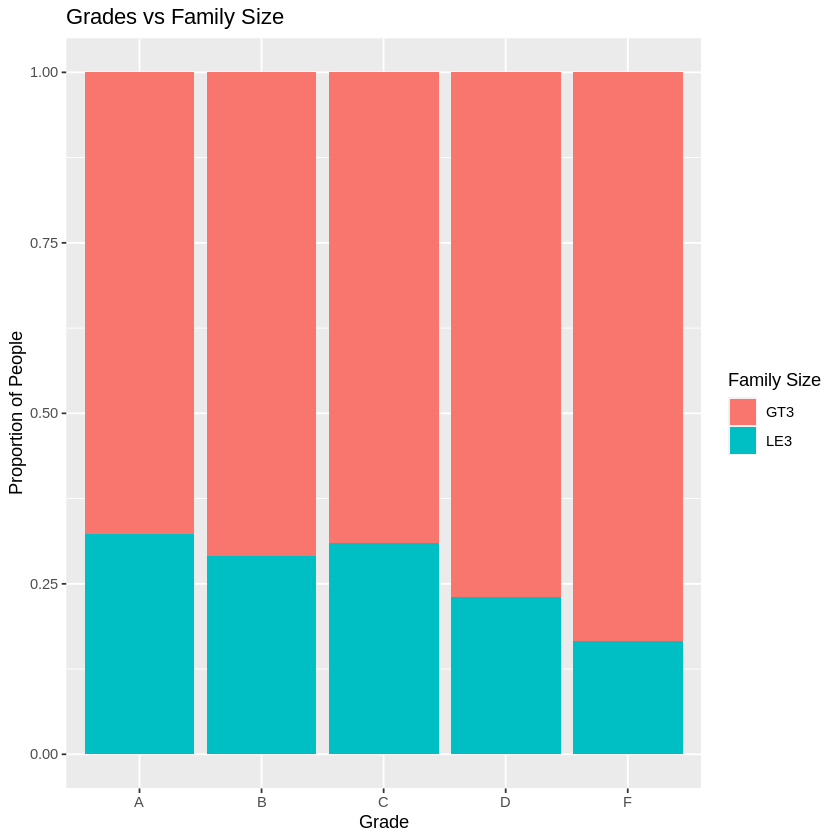

In [90]:
student_grades_plot<-ggplot(student_train_letters,aes(x=G3,fill=famsize))+
    geom_bar(position="fill")+
    xlab("Grade")+
    ylab("Proportion of People")+
    labs(fill="Family Size")+
    ggtitle("Grades vs Family Size")
student_grades_plot
    
  

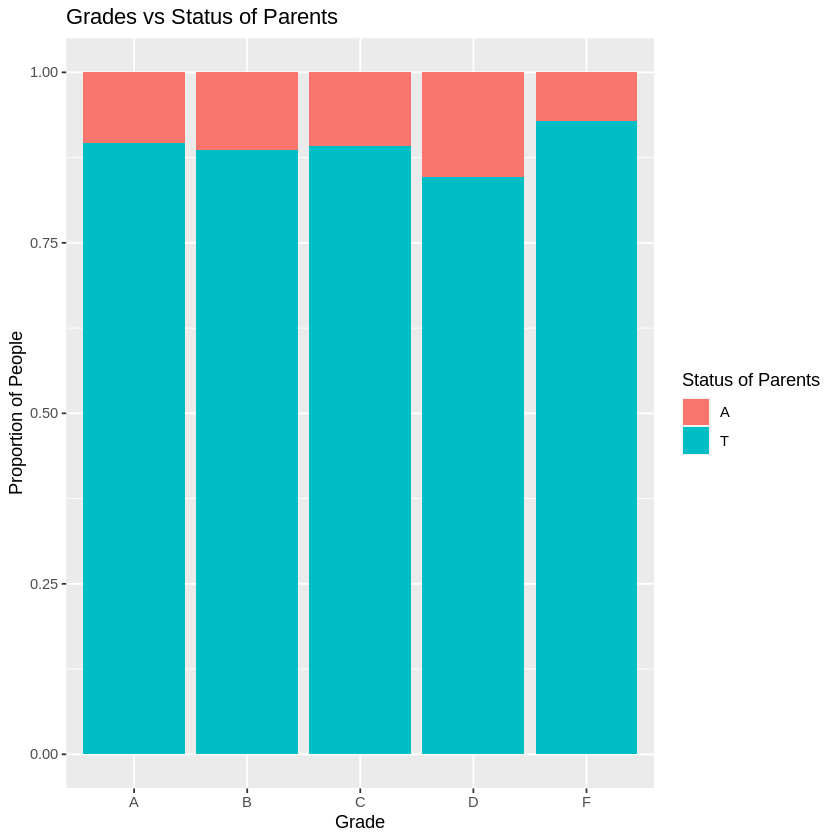

In [91]:
student_Pstatus_plot<-ggplot(student_train_letters,aes(x=G3,fill=Pstatus))+
    geom_bar(position="fill")+
    xlab("Grade")+
    ylab("Proportion of People")+
    labs(fill="Status of Parents")+
    ggtitle("Grades vs Status of Parents")
student_Pstatus_plot

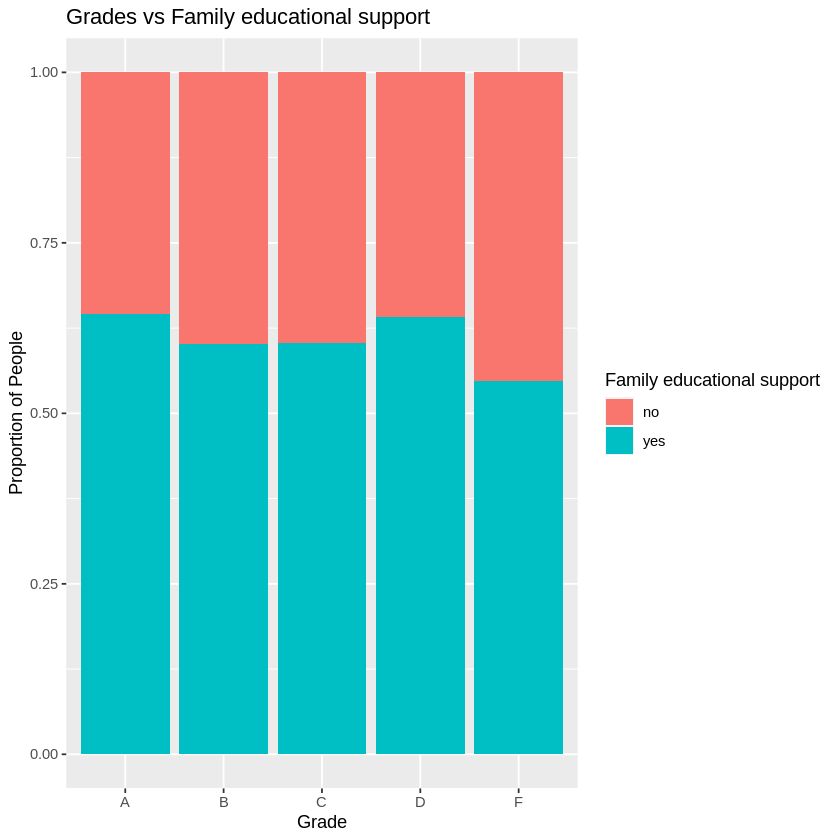

In [92]:
student_famsup_plot<-ggplot(student_train_letters,aes(x=G3,fill=famsup))+
    geom_bar(position="fill")+
    xlab("Grade")+
    ylab("Proportion of People")+
    labs(fill="Family educational support")+
    ggtitle("Grades vs Family educational support")
student_famsup_plot

 Methods
 
We will conduct our data analysis through classification using the KNN algorithm. We will first standardize all the values in the dataset, split the dataset into training and testing sets, then process classification. In addition, we will tune the classifier through cross-validation and pick the ideal K value that maximized the accuracy of our model.  
     Since we wish to classify a student’s final grades based on his/her familial and personal relationships. We chose most of our variables that directly reflects the student’s relationship background, in specific, these variables are chosen to be:

 

1)     Famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

2)     Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

3)     famsup - family educational support (binary: yes or no)

4)     romantic - with a romantic relationship (binary: yes or no)

5)     famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)


 Since we are working with all categorical variables, we have included  bar plots and boxplots to determine whether there are any trends/patterns for each of the predictor variables we plan to use in the analysis. 



Expected outcomes and significance

We expect that the students with healthier familial and personal relationships will achieve greater success in their academics, as they will be in a more positive environment which seems likely to foster higher achievement in school. By examining this connection between grades and a student’s relationships, we can develop a better understanding of the influence of non-academic factors on a student’s performance in school. In the future we could determine which non-academic variable plays the greatest role in influencing a students grades and whether alternative methods for prediction would lead to better predictive results.